In [1]:
!pip install networkx folium ortools osmnx matplotlib numpy pandas #STEP1

In [2]:
#STEP2
import networkx as nx
import matplotlib.pyplot as plt
import osmnx as ox
import folium

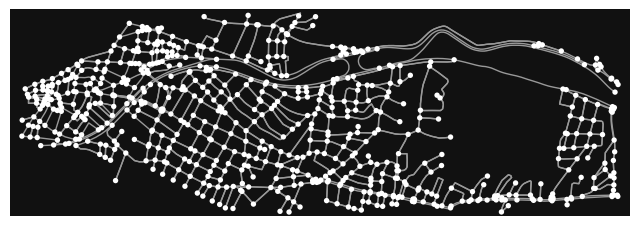

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
#YÖNTEM 1
GH = ox.graph_from_bbox((28.624216, 41.028049, 28.57540, 41.01580), network_type='drive')#41.016297
largest_subgraph = max(nx.strongly_connected_components(GH), key=len)
graph = GH.subgraph(largest_subgraph).copy()

ox.plot_graph(GH)

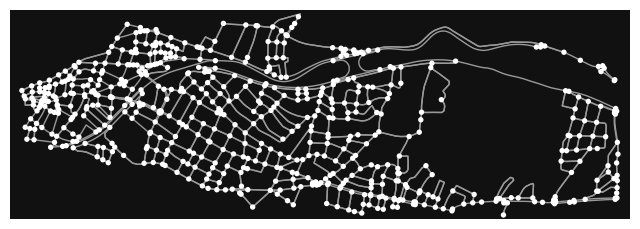

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
#YÖNTEM2
GH = ox.graph_from_bbox((28.624216, 41.028049, 28.57540, 41.01580), network_type='drive')
largest_subgraph = max(nx.strongly_connected_components(GH), key=len)
graph = GH.subgraph(largest_subgraph).copy()

# Alt grafiği çıkart (örneğin, yalnızca belirli dereceli düğümleri seç)
degree_cutoff = 3  # Örneğin, yalnızca derecesi >= 2 olan düğümleri seç
nodes_to_keep = [node for node, degree in dict(GH.degree()).items() if degree >= degree_cutoff]
reduced_graph = GH.subgraph(nodes_to_keep).copy()

# Grafiği görselleştir
ox.plot_graph(reduced_graph)

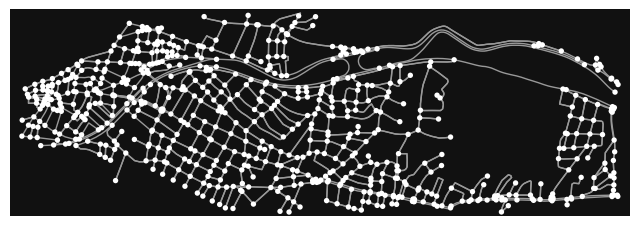

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [5]:
# Trafik yoğunluğu eşik değeri ile filtreleme YÖNTEM3
GH = ox.graph_from_bbox((28.624216, 41.028049, 28.57540, 41.01580), network_type='drive')
traffic_threshold = 0
selected_nodes = [node for node, data in GH.nodes(data=True) if data.get('traffic_count', 0) >= traffic_threshold]

filtered_graph = GH.subgraph(selected_nodes).copy()
ox.plot_graph(filtered_graph)


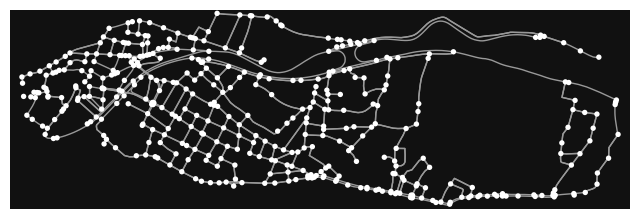

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [6]:
# Betweenness centrality hesapla YÖNTEM4
GH = ox.graph_from_bbox((28.624216, 41.028049, 28.57540, 41.01580), network_type='drive')
centrality = nx.betweenness_centrality(GH)

# Belirli bir eşiğin üzerindeki düğümleri seç
centrality_threshold = 0.01
selected_nodes = [node for node, value in centrality.items() if value >= centrality_threshold]

filtered_graph = GH.subgraph(selected_nodes).copy()
ox.plot_graph(filtered_graph)

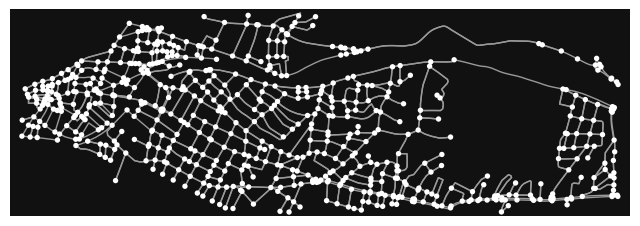

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [7]:
import osmnx as ox #YÖNTEM6

# Grafik oluştur
north, south, east, west = 41.028049, 41.01580, 28.624216, 28.57540
GH = ox.graph_from_bbox((28.624216, 41.028049, 28.57540, 41.01580), network_type='drive')

# Yol türlerini genişlet
desired_highways = ['motorway', 'primary', 'secondary', 'tertiary', 'residential', 'unclassified','service']

# Belirtilen yol türlerine sahip kenarları seç
selected_edges = [(u, v) for u, v, k in GH.edges(keys=True) if GH.edges[u, v, k]['highway'] in desired_highways]
selected_nodes = set([node for edge in selected_edges for node in edge])

# Filtrelenmiş grafiği oluştur
filtered_graph = GH.subgraph(selected_nodes).copy()

# Grafiği çizdir
ox.plot_graph(filtered_graph)


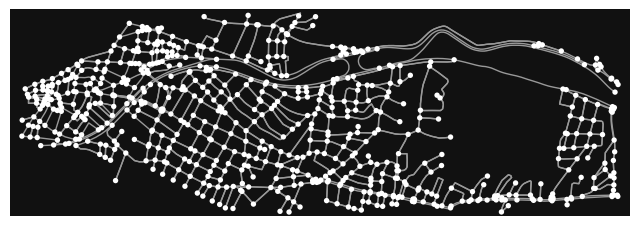

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [8]:
#STEP 3
#YÖNTEM7 YADA YÖNTEM6 İLE BİRLEŞTİREBİLİRİZ
GH = ox.graph_from_bbox((28.624216, 41.028049, 28.57540, 41.01580), network_type='drive')
largest_component = max(nx.weakly_connected_components(GH), key=len)
filtered_graph = GH.subgraph(largest_component).copy()
ox.plot_graph(filtered_graph)


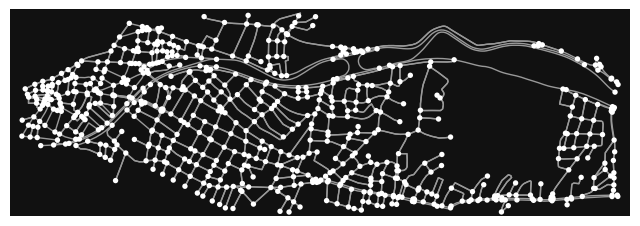

676

In [9]:
# Düğümleri ve kenarları al
GH = ox.graph_from_bbox((28.624216, 41.028049, 28.57540, 41.01580), network_type='drive')
import numpy as np
import random
nodes, edges = ox.graph_to_gdfs(GH)
#num_nodes = len(nodes)

# Rastgele düğümler seç (örneğin 5 düğüm)
num_nodes = 673
random.seed(673)  # Rastgele seçimlerin tekrarlanabilir olması için
random_nodes = np.random.choice(nodes.index, size=num_nodes, replace=False)
nodes.index
random_nodes
#edges
filtered_graph = GH.subgraph(random_nodes).copy()
ox.plot_graph(filtered_graph)
len(nodes)

In [10]:
#STEP4
mapping = {node: i+1 for i, node in enumerate(filtered_graph.nodes)}
renumbered_graph = nx.relabel_nodes(filtered_graph, mapping)
print("Yeni düğüm numaraları:", list(renumbered_graph.nodes))


Yeni düğüm numaraları: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,

In [11]:
#STEP5
import pandas as pd
import networkx as nx
nodes = list(renumbered_graph.nodes)
adj_matrix = nx.adjacency_matrix(renumbered_graph, nodelist=nodes).todense()
# Bağlantı matrisini pandas DataFrame'e dönüştür
adj_df = pd.DataFrame(adj_matrix, index=nodes, columns=nodes)

# Matrisin ilk birkaç satırını görüntüle
print("Adjacency Matrix (First 5 Rows):")
print(adj_df.head())

# Bağlantı matrisini CSV dosyasına kaydetmek isterseniz:
#adj_df.to_csv("adjacency_matrix.csv")
#print("Adjacency matrix has been saved as 'adjacency_matrix.csv'")
adj_df.to_excel("adjacency_matrix.xlsx", index=True)

print("Adjacency matrix has been saved as 'adjacency_matrix.xlsx'")

Adjacency Matrix (First 5 Rows):
   1    2    3    4    5    6    7    8    9    10   ...  664  665  666  667  \
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
5    0    0    0    0    0    1    0    0    0    0  ...    0    0    0    0   

   668  669  670  671  672  673  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  
5    0    0    0    0    0    0  

[5 rows x 673 columns]
Adjacency matrix has been saved as 'adjacency_matrix.xlsx'


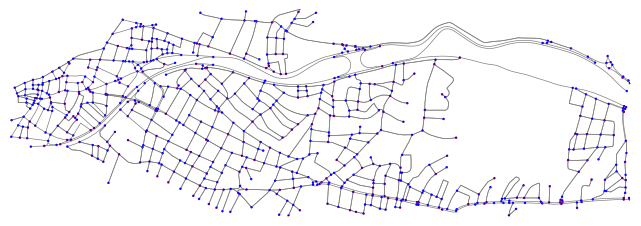

(28.5754926, 28.6242003, 41.0158067, 41.0279304)

In [12]:
#STEP6
import osmnx as ox
import matplotlib.pyplot as plt

# OpenStreetMap tabanlı grafiği harita üzerinde çizdir
fig, ax = ox.plot_graph(
    renumbered_graph,
    bgcolor='white',
    node_size=3,
    node_color='blue',
    edge_color='gray',
    edge_linewidth=0.5,
    show=False,
    close=False
)


for node, data in renumbered_graph.nodes(data=True):
    x, y = data['x'], data['y']  # Düğümün coğrafi koordinatları (lon, lat)
    ax.text(
        x, y, str(node),
        fontsize=0,
        color='red',
        ha='center',
        va='center'
    )

x_coords = [data['x'] for node, data in renumbered_graph.nodes(data=True)]
y_coords = [data['y'] for node, data in renumbered_graph.nodes(data=True)]

# ax.set_xlim(min(x_coords), max(x_coords))
# ax.set_ylim(min(y_coords), max(y_coords))

ax.set_xlim(28.57540, 28.624216)
ax.set_ylim(41.01580,41.028049)

# Haritayı göster

plt.show()
min(x_coords), max(x_coords), min(y_coords), max(y_coords)

In [13]:
import folium
import osmnx as ox


# OSMnx'ten gelen sınırlar (sol, sağ, yukarı, aşağı)
south = 41.01580  # Aşağı (enlem)
north = 41.028049  # Yukarı (enlem)
west = 28.57540  # Sol (boylam)
east = 28.624216  # Sağ (boylam)

# Folium haritası oluştur (merkez verilmeden)
m = folium.Map(zoom_start=14)
m.fit_bounds([[south, west], [north, east]])

# OSMnx grafiğindeki düğümleri haritaya ekle ve numaralarını yazdır
for node, data in renumbered_graph.nodes(data=True):
    folium.CircleMarker(
        location=[data['y'], data['x']],  # Düğümün coğrafi koordinatları (latitude, longitude)
        radius=3,  # Düğüm boyutu
        color="blue",  # Çember rengi
        fill=True,
        fill_color="blue",
        fill_opacity=0.6,
        tooltip=str(node),  # Düğüm numarasını göstermek için tooltip kullan
    ).add_to(m)

# OSMnx grafiğindeki yolları (kenarları) haritaya ekle
for u, v, key, data in renumbered_graph.edges(keys=True, data=True):
    if 'geometry' in data:  # Eğer geometri varsa (daha doğru yollar için)
        coords = [(y, x) for x, y in data['geometry'].coords]
    else:  # Eğer geometri yoksa, düğümlerin koordinatlarını kullan
        coords = [(renumbered_graph.nodes[u]['y'], renumbered_graph.nodes[u]['x']),
                  (renumbered_graph.nodes[v]['y'], renumbered_graph.nodes[v]['x'])]
    folium.PolyLine(
        coords,
        color="gray",  # Çizgi rengi
        weight=2,  # Çizgi kalınlığı
        opacity=0.6,
    ).add_to(m)

# Haritayı kaydetmek için
m.save("map_with_node_numbers.html")

# Haritayı göster
m


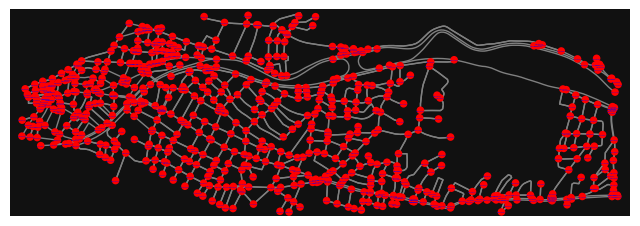

In [14]:
import osmnx as ox
import matplotlib.pyplot as plt

# Grafiği çiz, matplotlib figürü ve eksenini döndür
fig, ax = ox.plot_graph(GH, show=False, close=False, node_size=30, node_color='red', edge_color='gray')

# Düğümlerin pozisyonlarını alın
pos = {node: (data['x'], data['y']) for node, data in GH.nodes(data=True)}

# Düğüm numaralarını çizim üzerine ekleyin
for node, (x, y) in pos.items():
    ax.text(x, y, str(node), fontsize=1, color='blue', ha='center', va='center')

# Görselleştir
plt.show()

First 10 new node numbers: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


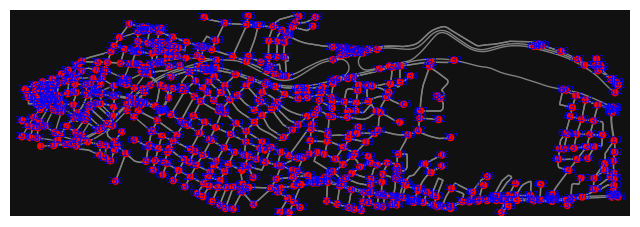

In [15]:
# Create the mapping for renumbering
mapping = {node: i+1 for i, node in enumerate(GH.nodes)}

# Renumber the nodes
renumbered_GH = nx.relabel_nodes(GH, mapping)

# Print first few nodes to verify the renumbering
print("First 10 new node numbers:", list(renumbered_GH.nodes)[:10])

# Create a new visualization with the renumbered nodes
fig, ax = ox.plot_graph(renumbered_GH,
                       show=False,
                       close=False,
                       node_size=30,
                       node_color='red',
                       edge_color='gray')

# Get new node positions
pos = {node: (data['x'], data['y']) for node, data in renumbered_GH.nodes(data=True)}

# Add new node labels with larger font size for better visibility
for node, (x, y) in pos.items():
    ax.text(x, y, str(node), fontsize=6, color='blue', ha='center', va='center')

plt.show()

In [16]:
import numpy as np

# Get total number of nodes
total_nodes = list(renumbered_GH.nodes)

# Print total nodes for verification
print(f"Total nodes: {len(total_nodes)}")
print(f"Nodes: {total_nodes}")

# Create a map with all nodes
m = folium.Map(location=[41.022173, 28.599808], zoom_start=14)

# Add all edges first (keeping the network structure visible)
for _, edge in edges.iterrows():
    if "geometry" in edge:
        coords = [(point[1], point[0]) for point in edge.geometry.coords]
        folium.PolyLine(coords, color="blue", weight=2.5, opacity=0.8).add_to(m)

# Add all nodes
for node_id in total_nodes:
    data = renumbered_GH.nodes[node_id]
    folium.CircleMarker(
        location=(data['y'], data['x']),
        radius=5,
        color='red',
        fill=True,
        fillOpacity=0.7,
        popup=str(node_id),
        tooltip=f"Node {node_id}"
    ).add_to(m)

m.save("all_renumbered_nodes_map.html")

Total nodes: 676
Nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217

In [17]:
adj_matrix = nx.to_numpy_array(GH, weight='length')
np.savetxt("adj_matrix.csv", adj_matrix, delimiter=",")
adj_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 18.93895045],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [18]:

import pandas as pd
import networkx as nx

# Eğer graph bir dict ise, networkx grafiğine dönüştür
# Örneğin, {node1: {node2: weight, ...}, ...} şeklinde bir yapı
if isinstance(GH, dict):
    # Directed veya undirected graph seçimi
    #nx_graph = nx.DiGraph()  # Yönlü grafik için
    nx_graph = nx.Graph()  # Yönsüz grafik için

    # Sözlükteki düğüm ve kenarları ekle
    for node, edges in graph.items():
        for neighbor, weight in edges.items():
            if weight > 0:  # Sadece pozitif ağırlıklı yolları ekle
                nx_graph.add_edge(node, neighbor, length=weight)
else:
    nx_graph = GH  # Eğer zaten bir networkx grafiği ise

# Renumber the nodes with renumbered_GH
renumbered_GH = {old_node: new_node for new_node, old_node in enumerate(nx_graph.nodes)}
renumbered_graph = nx.relabel_nodes(nx_graph, renumbered_GH)

# Create the adjacency matrix as a numpy array
node_indices = list(renumbered_graph.nodes)
adj_matrix = nx.to_numpy_array(renumbered_graph, nodelist=node_indices, weight='length')

# Convert the adjacency matrix to a pandas DataFrame with updated node indices
adj_matrix_df = pd.DataFrame(adj_matrix, index=node_indices, columns=node_indices)

# Save the DataFrame to a CSV file
adj_matrix_df.to_csv("renumbered_adj_matrix_with_node_indices.csv")

# Display the DataFrame
print(adj_matrix_df)

     0    1    2    3    4          5    6    7    8    9    ...  666  667  \
0    0.0  0.0  0.0  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  72.603764  0.0  0.0  0.0  0.0  ...  0.0  0.0   
..   ...  ...  ...  ...  ...        ...  ...  ...  ...  ...  ...  ...  ...   
671  0.0  0.0  0.0  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
672  0.0  0.0  0.0  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
673  0.0  0.0  0.0  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
674  0.0  0.0  0.0  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
675  0.0  0.0  0.0  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   

     668  669  670  671  672        673  674       675  
0    0

In [19]:
import folium
import osmnx as ox



# OSMnx'ten gelen sınırlar (sol, sağ, yukarı, aşağı)
south = 41.01580  # Aşağı (enlem)
north = 41.028049  # Yukarı (enlem)
west = 28.57540  # Sol (boylam)
east = 28.624216  # Sağ (boylam)

# Folium haritası oluştur (merkez verilmeden)
m = folium.Map(zoom_start=14)

# Harita sınırlarını ayarla (fit_bounds ile bounding box belirle)
m.fit_bounds([[south, west], [north, east]])

# OSMnx grafiğindeki düğümleri haritaya ekle
for node, data in graph.nodes(data=True):
    folium.CircleMarker(
        location=[data['y'], data['x']],  # Düğümün coğrafi koordinatları (latitude, longitude)
        radius=3,  # Düğüm boyutu
        color="blue",  # Çember rengi
        fill=True,
        fill_color="blue",
        fill_opacity=0.6,
    ).add_to(m)

# OSMnx grafiğindeki yolları (kenarları) haritaya ekle
for u, v, key, data in graph.edges(keys=True, data=True):
    if 'geometry' in data:  # Eğer geometri varsa (daha doğru yollar için)
        coords = [(y, x) for x, y in data['geometry'].coords]
    else:  # Eğer geometri yoksa, düğümlerin koordinatlarını kullan
        coords = [(graph.nodes[u]['y'], graph.nodes[u]['x']),
                  (graph.nodes[v]['y'], graph.nodes[v]['x'])]
    folium.PolyLine(
        coords,
        color="gray",  # Çizgi rengi
        weight=2,  # Çizgi kalınlığı
        opacity=0.6,
    ).add_to(m)

# Haritayı kaydetmek için
m.save("map_with_osmnx.html")

# Haritayı göster
m


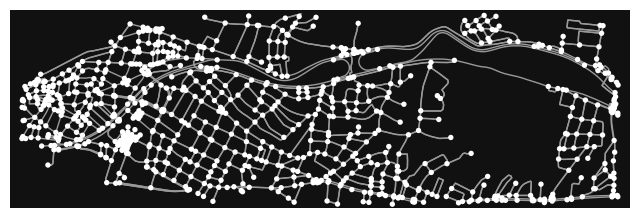

In [20]:
import folium
import osmnx as ox
import networkx as nx

# OSMnx'ten gelen sınırlar (sol, sağ, yukarı, aşağı)
south = 41.01580
north = 41.028049
west  = 28.57540
east  = 28.624216

# OSMnx 2.x: bbox sırası (left, bottom, right, top) = (west, south, east, north)
bbox = (west, south, east, north)
G = ox.graph_from_bbox((28.624216, 41.028049, 28.57540, 41.016297), retain_all=True)
ox.plot_graph(G)
# # Yol ağını al
# G = ox.graph_from_bbox(
#     bbox=bbox,
#     #network_type="drive",
#     retain_all=True,
#     #simplify=True
# )

# Yönsüz graph (iki node arası çift yön varsayımı)
G_undirected = nx.Graph(G)

# Node'ları 0..N-1 renumber (STEP7'de renumbered_graph kullanıyorsunuz)
mapping = {old_id: new_id for new_id, old_id in enumerate(G_undirected.nodes())}
renumbered_graph = nx.relabel_nodes(G_undirected, mapping, copy=True)

# Folium haritası
m = folium.Map(zoom_start=14)
m.fit_bounds([[south, west], [north, east]])

# Düğümleri haritaya ekle
for node, data in renumbered_graph.nodes(data=True):
    folium.Marker(
        location=[data["y"], data["x"]],
        icon=folium.DivIcon(
            html=f"""
            <div style="font-size: 10px; color: black; font-weight: bold;">
                {node}
            </div>
            """
        )
    ).add_to(m)

    folium.CircleMarker(
        location=[data["y"], data["x"]],
        radius=2,
        color="grey",
        fill=True,
        fill_color="grey",
        fill_opacity=0.6,
    ).add_to(m)

# Kenarları (yolları) haritaya ekle
# nx.Graph olduğu için keys=True KULLANILMAZ
for u, v, data in renumbered_graph.edges(data=True):
    if "geometry" in data and data["geometry"] is not None and hasattr(data["geometry"], "coords"):
        coords = [(y, x) for x, y in data["geometry"].coords]
    else:
        coords = [
            (renumbered_graph.nodes[u]["y"], renumbered_graph.nodes[u]["x"]),
            (renumbered_graph.nodes[v]["y"], renumbered_graph.nodes[v]["x"]),
        ]

    folium.PolyLine(
        coords,
        color="gray",
        weight=2,
        opacity=0.6,
    ).add_to(m)

m.save("map_with_osmnx.html")
m



In [22]:
import folium
import networkx as nx
import colorsys

# =========================
# 1) SEN BURAYI DOLDUR
# =========================
vehicle_routes = {
    "Vehicle-1": [663, 534, 700, 330, 317, 330, 700, 534, 663],
    "Vehicle-2": [663, 253, 174, 464, 174,253, 663],
    "Vehicle-3": [663, 36, 607, 449, 748, 449,36, 663],
}

depot_nodes  = [663]                 # depolar (renumbered id)
demand_nodes = [317, 464, 607, 748]  # talepler (renumbered id)

G = renumbered_graph  # <-- ÖNEMLİ: yeniden graph kurma, mevcut olanı kullan


# =========================
# 2) MAP (bounds'i graph'tan al)
# =========================
ys = list(nx.get_node_attributes(G, "y").values())
xs = list(nx.get_node_attributes(G, "x").values())
south, north = min(ys), max(ys)
west,  east  = min(xs), max(xs)

m = folium.Map(location=[(south+north)/2, (west+east)/2], zoom_start=14)
m.fit_bounds([[south, west], [north, east]])


# =========================
# 3) YARDIMCILAR
# =========================
def _pick_color(i: int) -> str:
    pal = ["#00bcd4", "#ff00ff", "#00c853", "#ff6d00", "#7c4dff",
           "#ffd600", "#d50000", "#2962ff", "#00e676", "#aa00ff"]
    if i < len(pal): return pal[i]
    h = (i * 0.61803398875) % 1.0
    r,g,b = colorsys.hsv_to_rgb(h, 0.7, 0.95)
    return f"#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}"

def _add_legend(m, items, title="Vehicle Routes"):
    rows = "".join([f"""
    <div style="display:flex;align-items:center;margin:2px 0;">
      <div style="width:14px;height:14px;background:{c};margin-right:8px;border:1px solid #333;"></div>
      <div style="font-size:12px;">{n}</div>
    </div>""" for n,c in items])
    html = f"""
    <div style="position:fixed;bottom:30px;left:30px;z-index:9999;background:white;padding:10px 12px;
                border:1px solid #333;border-radius:6px;box-shadow:0 1px 6px rgba(0,0,0,0.2);">
      <div style="font-weight:600;margin-bottom:6px;font-size:13px;">{title}</div>{rows}
    </div>"""
    m.get_root().html.add_child(folium.Element(html))

def _edge_attr(G, u, v):
    ed = G.get_edge_data(u, v)
    if ed is None:
        return {}
    # MultiGraph olsaydı dict-of-dict olurdu; Graph'ta direkt dict gelir
    if isinstance(ed, dict) and ed and all(isinstance(val, dict) for val in ed.values()):
        k = min(ed, key=lambda kk: ed[kk].get("length", float("inf")))
        return ed[k]
    return ed

def _stitch(route_coords, seg):
    if not route_coords:
        route_coords.extend(seg); return
    last = route_coords[-1]
    d0 = (last[0]-seg[0][0])**2 + (last[1]-seg[0][1])**2
    d1 = (last[0]-seg[-1][0])**2 + (last[1]-seg[-1][1])**2
    if d1 < d0:
        seg = seg[::-1]
    route_coords.extend(seg[1:] if route_coords[-1] == seg[0] else seg)

def _nodes_to_coords(G, node_list):
    coords = []
    for u, v in zip(node_list[:-1], node_list[1:]):
        data = _edge_attr(G, u, v) or {}
        if "geometry" in data and data["geometry"] is not None and hasattr(data["geometry"], "coords"):
            seg = [(lat, lon) for lon, lat in data["geometry"].coords]
        else:
            seg = [(G.nodes[u]["y"], G.nodes[u]["x"]),
                   (G.nodes[v]["y"], G.nodes[v]["x"])]
        _stitch(coords, seg)
    return coords

# weight attr varsa kullan (yoksa unweighted)
_has_length = any(("length" in d) for _,_,d in G.edges(data=True))
_weight_attr = "length" if _has_length else None

def _route_to_coord_segments(G, route_nodes):
    """
    Edge yoksa shortest_path ile doldurur.
    NoPath olursa: düz çizgi çizmez -> segmenti keser.
    """
    if len(route_nodes) < 2:
        return []

    segs = []
    cur = [route_nodes[0]]

    for a, b in zip(route_nodes[:-1], route_nodes[1:]):
        if a == b:
            continue

        if G.has_edge(a, b):
            cur.append(b)
            continue

        try:
            if _weight_attr:
                sp = nx.shortest_path(G, a, b, weight=_weight_attr)
            else:
                sp = nx.shortest_path(G, a, b)
            cur.extend(sp[1:])
        except nx.NetworkXNoPath:
            # mevcut segmenti kapat
            if len(cur) > 1:
                segs.append(_nodes_to_coords(G, cur))
            cur = [b]

    if len(cur) > 1:
        segs.append(_nodes_to_coords(G, cur))

    return segs


# =========================
# 4) TÜM NODE'LARI RAKAMSIZ ÇİZ (gri noktalar)
# =========================
all_nodes_layer = folium.FeatureGroup(name="All nodes (without numbered)", show=True)
all_nodes_layer.add_to(m)

# (çok node varsa ağır olabilir; radius=1 en hafif)
for n, data in G.nodes(data=True):
    folium.CircleMarker(
        location=[data["y"], data["x"]],
        radius=1,
        color="grey",
        weight=1,
        fill=True,
        fill_color="grey",
        fill_opacity=0.35
    ).add_to(all_nodes_layer)


# =========================
# 5) ARAÇ ROTALARI (solid + outline, pane ile)
# =========================
folium.map.CustomPane("route_outline", z_index=549).add_to(m)
folium.map.CustomPane("route_lines",   z_index=550).add_to(m)

legend_items = []

for i, (veh_name, route) in enumerate(vehicle_routes.items()):
    color = _pick_color(i)
    legend_items.append((veh_name, color))

    # debug: eksik node var mı?
    missing = [n for n in route if n not in G.nodes]
    if missing:
        print(f"Uyarı: {veh_name} grafikte olmayan node içeriyor:", missing)
        continue

    fg = folium.FeatureGroup(name=veh_name, show=True)
    fg.add_to(m)

    segs = _route_to_coord_segments(G, route)
    if not segs:
        print(f"Uyarı: {veh_name} için çizilecek segment çıkmadı (NoPath olabilir).")
        continue

    # outline PASS
    for coords in segs:
        if len(coords) < 2:
            continue
        folium.PolyLine(
            coords,
            color="white",
            weight=6,          # outline kalınlığı
            opacity=1.0,
            line_cap="butt",
            line_join="bevel",
            pane="route_outline",
        ).add_to(fg)

    # colored PASS (SOLID)
    for coords in segs:
        if len(coords) < 2:
            continue
        folium.PolyLine(
            coords,
            color=color,
            weight=3,          # araç çizgisi
            opacity=0.95,
            line_cap="butt",
            line_join="bevel",
            smooth_factor=1.0,
            pane="route_lines",
            tooltip=veh_name
        ).add_to(fg)

_add_legend(m, legend_items, "Vehicle Routes")


# =========================
# 6) SADECE DEPO + TALEP NODE'LARINA NUMARA KOY
# =========================
folium.map.CustomPane("special_nodes", z_index=650).add_to(m)

depot_layer  = folium.FeatureGroup(name="Depot", show=True).add_to(m)
demand_layer = folium.FeatureGroup(name="Demand", show=True).add_to(m)

# Depolar (mavi + numara)
for n in depot_nodes:
    if n not in G.nodes:
        print("Uyarı: grafikte olmayan depo node:", n)
        continue
    y, x = G.nodes[n]["y"], G.nodes[n]["x"]

    folium.CircleMarker(
        location=[y, x],
        radius=8,
        color="black",
        weight=2,
        fill=True,
        fill_color="#1976d2",
        fill_opacity=0.95,
        pane="special_nodes",
        tooltip=f"DEPOT {n}"
    ).add_to(depot_layer)

    folium.Marker(
        location=[y, x],
        icon=folium.DivIcon(
            html=f"""
            <div style="
                font-size: 12px;
                color: white;
                font-weight: 900;
                background: rgba(25,118,210,0.95);
                padding: 1px 6px;
                border-radius: 10px;
                border: 1px solid #111;
                ">
                {n}
            </div>
            """
        ),
        pane="special_nodes"
    ).add_to(depot_layer)

# Talepler (sarı + numara)
for n in demand_nodes:
    if n not in G.nodes:
        print("Uyarı: grafikte olmayan talep node:", n)
        continue
    y, x = G.nodes[n]["y"], G.nodes[n]["x"]

    folium.CircleMarker(
        location=[y, x],
        radius=7,
        color="black",
        weight=2,
        fill=True,
        fill_color="yellow",
        fill_opacity=0.95,
        pane="special_nodes",
        tooltip=f"DEMAND {n}"
    ).add_to(demand_layer)

    folium.Marker(
        location=[y, x],
        icon=folium.DivIcon(
            html=f"""
            <div style="
                font-size: 12px;
                color: black;
                font-weight: 900;
                background: rgba(255,255,255,0.90);
                padding: 1px 4px;
                border-radius: 4px;
                border: 1px solid #222;
                ">
                {n}
            </div>
            """
        ),
        pane="special_nodes"
    ).add_to(demand_layer)

folium.LayerControl(collapsed=False).add_to(m)

m.save("map_routes_nodes_depot_demand.html")
m

In [ ]:
import folium
import networkx as nx
import colorsys

# =========================
# 1) SEN BURAYI DOLDUR
# =========================
G = renumbered_graph  # <-- mevcut graph

depot_nodes  = [663]
demand_nodes = [317, 607, 464, 748]

# Kademeli rota: her stage ayrı bir vektör
# Not: stage'ler birbirine "kaldığı yerden" devam etsin diye,
# Stage-2'nin ilk elemanı Stage-1'in son elemanı olmalı (555 gibi).
vehicle_stage_routes = {
    "Vehicle-1": [
        [663,317, 210],                  # Stage-1 (kırmızı)
        [210, 607, 464, 748, 494],                  # Stage-2 (yeşil)
        [494, 663],         # Stage-3 (mavi) depot'a dönüş
    ]
}

# Stage renkleri (istediğin gibi değiştir)
stage_colors = ["#d50000", "#00c853", "#2962ff"]  # kırmızı, yeşil, mavi


# =========================
# 2) MAP (bounds'i graph'tan al)
# =========================
ys = list(nx.get_node_attributes(G, "y").values())
xs = list(nx.get_node_attributes(G, "x").values())
south, north = min(ys), max(ys)
west,  east  = min(xs), max(xs)

m = folium.Map(location=[(south+north)/2, (west+east)/2], zoom_start=14)
m.fit_bounds([[south, west], [north, east]])

# Panes (z-index kontrolü)
try:
    folium.map.CustomPane("route_outline", z_index=549).add_to(m)
    folium.map.CustomPane("route_lines",   z_index=550).add_to(m)
    folium.map.CustomPane("special_nodes", z_index=650).add_to(m)
    _HAS_PANES = True
except Exception:
    _HAS_PANES = False


# =========================
# 3) YARDIMCILAR
# =========================
def _add_legend(m, items, title="Gradual Route"):
    rows = ""
    for name, color in items:
        rows += f"""
        <div style="display:flex; align-items:center; margin:2px 0;">
            <div style="width:14px; height:14px; background:{color}; margin-right:8px; border:1px solid #333;"></div>
            <div style="font-size:12px;">{name}</div>
        </div>
        """
    html = f"""
    <div style="
        position: fixed;
        bottom: 30px; left: 30px;
        z-index: 9999;
        background: white;
        padding: 10px 12px;
        border: 1px solid #333;
        border-radius: 6px;
        box-shadow: 0 1px 6px rgba(0,0,0,0.2);
        ">
        <div style="font-weight:600; margin-bottom:6px; font-size:13px;">{title}</div>
        {rows}
    </div>
    """
    m.get_root().html.add_child(folium.Element(html))

def _edge_attr(G, u, v):
    ed = G.get_edge_data(u, v)
    if ed is None:
        return {}
    # MultiGraph olsaydı dict-of-dict olurdu; Graph'ta direkt dict gelir
    if isinstance(ed, dict) and ed and all(isinstance(val, dict) for val in ed.values()):
        k = min(ed, key=lambda kk: ed[kk].get("length", float("inf")))
        return ed[k]
    return ed

def _stitch(route_coords, seg):
    if not route_coords:
        route_coords.extend(seg); return
    last = route_coords[-1]
    d0 = (last[0]-seg[0][0])**2 + (last[1]-seg[0][1])**2
    d1 = (last[0]-seg[-1][0])**2 + (last[1]-seg[-1][1])**2
    if d1 < d0:
        seg = seg[::-1]
    route_coords.extend(seg[1:] if route_coords[-1] == seg[0] else seg)

def _nodes_to_coords(G, node_list):
    coords = []
    for u, v in zip(node_list[:-1], node_list[1:]):
        data = _edge_attr(G, u, v) or {}
        if "geometry" in data and data["geometry"] is not None and hasattr(data["geometry"], "coords"):
            seg = [(lat, lon) for lon, lat in data["geometry"].coords]
        else:
            seg = [(G.nodes[u]["y"], G.nodes[u]["x"]),
                   (G.nodes[v]["y"], G.nodes[v]["x"])]
        _stitch(coords, seg)
    return coords

_has_length = any(("length" in d) for _,_,d in G.edges(data=True))
_weight_attr = "length" if _has_length else None

def _route_to_coord_segments(G, route_nodes):
    """
    Edge yoksa shortest_path ile doldurur.
    NoPath olursa: düz çizgi çizmez -> segmenti keser.
    """
    if len(route_nodes) < 2:
        return []

    segs = []
    cur = [route_nodes[0]]

    for a, b in zip(route_nodes[:-1], route_nodes[1:]):
        if a == b:
            continue

        if G.has_edge(a, b):
            cur.append(b)
            continue

        try:
            if _weight_attr:
                sp = nx.shortest_path(G, a, b, weight=_weight_attr)
            else:
                sp = nx.shortest_path(G, a, b)
            cur.extend(sp[1:])
        except nx.NetworkXNoPath:
            if len(cur) > 1:
                segs.append(_nodes_to_coords(G, cur))
            cur = [b]

    if len(cur) > 1:
        segs.append(_nodes_to_coords(G, cur))

    return segs

def draw_stage(fg, coords_list, color, weight=4, opacity=0.95, outline=True):
    for coords in coords_list:
        if len(coords) < 2:
            continue

        # outline
        if outline:
            kw = dict(color="white", weight=weight+3, opacity=1.0, line_cap="butt", line_join="bevel")
            if _HAS_PANES: kw["pane"] = "route_outline"
            folium.PolyLine(coords, **kw).add_to(fg)

        # colored
        kw = dict(color=color, weight=weight, opacity=opacity, line_cap="butt", line_join="bevel", smooth_factor=1.0)
        if _HAS_PANES: kw["pane"] = "route_lines"
        folium.PolyLine(coords, **kw).add_to(fg)


# =========================
# 4) TÜM NODE'LARI RAKAMSIZ ÇİZ (gri noktalar)
# =========================
all_nodes_layer = folium.FeatureGroup(name="Tüm node'lar (rakamsız)", show=True).add_to(m)

for n, data in G.nodes(data=True):
    folium.CircleMarker(
        location=[data["y"], data["x"]],
        radius=1,
        color="grey",
        weight=1,
        fill=True,
        fill_color="grey",
        fill_opacity=0.35,
    ).add_to(all_nodes_layer)


# =========================
# 5) SADECE DEPO + TALEP NODE'LARINA NUMARA KOY
# =========================
depot_layer  = folium.FeatureGroup(name="Depo", show=True).add_to(m)
demand_layer = folium.FeatureGroup(name="Talep", show=True).add_to(m)

# Depo
for n in depot_nodes:
    if n not in G.nodes:
        print("Uyarı: grafikte olmayan depo node:", n)
        continue
    y, x = G.nodes[n]["y"], G.nodes[n]["x"]
    folium.CircleMarker(
        location=[y, x],
        radius=8,
        color="black",
        weight=2,
        fill=True,
        fill_color="#1976d2",
        fill_opacity=0.95,
        tooltip=f"DEPOT {n}",
        **({"pane":"special_nodes"} if _HAS_PANES else {})
    ).add_to(depot_layer)

    folium.Marker(
        location=[y, x],
        icon=folium.DivIcon(
            html=f"""
            <div style="font-size:12px;color:white;font-weight:900;
                        background:rgba(25,118,210,0.95);padding:1px 6px;border-radius:10px;
                        border:1px solid #111;">{n}</div>
            """
        ),
        **({"pane":"special_nodes"} if _HAS_PANES else {})
    ).add_to(depot_layer)

# Demand
for n in demand_nodes:
    if n not in G.nodes:
        print("Uyarı: grafikte olmayan talep node:", n)
        continue
    y, x = G.nodes[n]["y"], G.nodes[n]["x"]
    folium.CircleMarker(
        location=[y, x],
        radius=7,
        color="black",
        weight=2,
        fill=True,
        fill_color="yellow",
        fill_opacity=0.95,
        tooltip=f"DEMAND {n}",
        **({"pane":"special_nodes"} if _HAS_PANES else {})
    ).add_to(demand_layer)

    folium.Marker(
        location=[y, x],
        icon=folium.DivIcon(
            html=f"""
            <div style="font-size:12px;color:black;font-weight:900;
                        background:rgba(255,255,255,0.90);padding:1px 4px;border-radius:4px;
                        border:1px solid #222;">{n}</div>
            """
        ),
        **({"pane":"special_nodes"} if _HAS_PANES else {})
    ).add_to(demand_layer)


# =========================
# 6) KADEMELİ (STAGE) ROTA ÇİZ
# =========================
legend_items = []

for veh_name, stages in vehicle_stage_routes.items():
    fg = folium.FeatureGroup(name=veh_name, show=True).add_to(m)

    for s_idx, stage_nodes in enumerate(stages):
        # renk seç
        c = stage_colors[s_idx % len(stage_colors)]
        legend_items.append((f"{veh_name} - Stage {s_idx+1}", c))

        # node validasyonu
        missing_nodes = [n for n in stage_nodes if n not in G.nodes]
        if missing_nodes:
            print(f"Uyarı: {veh_name} Stage-{s_idx+1} grafikte olmayan node içeriyor:", missing_nodes)
            continue

        # stage'i coords'a çevir (gerekirse shortest_path ile doldurur)
        segs = _route_to_coord_segments(G, stage_nodes)
        if not segs:
            print(f"Uyarı: {veh_name} Stage-{s_idx+1} için çizilecek segment çıkmadı (NoPath olabilir).")
            continue

        # çiz
        draw_stage(
            fg=fg,
            coords_list=segs,
            color=c,
            weight=4,          # istediğin gibi değiştir
            opacity=0.95,
            outline=True
        )

        # tooltip için küçük bilgi (isteğe bağlı)
        # Not: PolyLine'lara tooltip eklemek istersen ayrıca yapılır.

# legend
_add_legend(m, legend_items, "Gradual Route (Stage)")

folium.LayerControl(collapsed=False).add_to(m)

m.save("map_vehicle_staged_routes.html")
m
